# Project 31 - Phase 2: Exploratory Data Analysis and Feature Selection

## Exploratory Data Analysis

In the 'Exploratory data analysis (EDA)' stage, we "get to know" our data. We will try to learn as much about the data as possible.
We will perform the below steps as part of EDA:
1. Basic Information about our dataset
    * Shape
    * Datatypes
    * Statistics like mean, median, standard deviation
    * Duplicate obsrvations, if any
2. Distributions of various features
    * Histograms for numeric features
    * Count Plots for categorical features
3. Correlations among various features
    * Correlation Grid/ Heatmap
4. Segmentations of various features
    * Univariate Segmentations
    * Bivariate Segmentations

**Importing the libraries**

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for visualization
import seaborn as sns
sns.set_style('darkgrid')

# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Reading in the dataset, and displaying first 5 observations**

In [2]:
# Read the dataset
df = pd.read_csv('Dataset/train.csv')
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


### I . Basic Information about our data

In [3]:
# Dataframe dimensions
df.shape

(595212, 59)

So, we can see that:
* The dataset has **595212 observations**, and **59 features.** 
* Out of the 59 features, one is our **target** variable

**We can drop the 'id' column from our dataset, as it is unimportant for our Analysis**

In [4]:
# Drop the 'id' column
df = df.drop('id', axis=1)
print( df.shape )

(595212, 58)


Now, after removing the **'id'**  column from our dataset, we now have **58 features (including the target variable)**

**Data types of our features**

In [5]:
# Column datatypes
df.dtypes

target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15         float64
ps_calc_01  

We can conclude that
* **All our features are numerical features** (either int64 or float64)
* The **'target'**  variable is an **integer feature**  with **values = 0 or 1**

We already know from the dataset information that feature names - 
1. having the postfix **bin**  indicate **binary features**
2. having the postfix **cat**  indicate**categorical features**
3. without these designations are **either continuous or ordinal**

Let's group these features into separate lists:

In [6]:
# Target variable
target = ['target']

# All binary input features
bin_features = ['ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin',
                'ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_16_bin','ps_ind_17_bin',
                'ps_ind_18_bin','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin',
                'ps_calc_19_bin','ps_calc_20_bin']

# All categorical features, already encoded as numeric
cat_features = ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_02_cat',
                'ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat',
                'ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat']

# All continuos valued features, already encoded as numeric
cont_features = ['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_reg_01','ps_reg_02','ps_reg_03',
                 'ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02',
                 'ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09',
                 'ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14']

In [10]:
print("Number of binary input features: ", len(bin_features))
print("Number of categorical input features: ", len(cat_features))
print("Number of continuous input features: ", len(cont_features))

Number of binary input features:  17
Number of categorical input features:  14
Number of continuous input features:  26


**Our dataset is balanced or imbalanced?**

In [7]:
# Unique counts of target variable
print( df.target.value_counts())

0    573518
1     21694
Name: target, dtype: int64


Our dataset is **highly imbalanced**  with **less than 4% observations as positive.**

**Does our dataset have any duplicate observations?**

In [9]:
print( df.duplicated().sum() )

0


We can see that, there are **no duplicate observations** in our dataset

**Summary statistics of the features**

In [8]:
# Summarize the numeric features
df.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.765811,0.368

**Which features have missing data?**

In [21]:
print( df.columns[(df==-1).sum(axis=0) > 0] )

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat',
       'ps_car_07_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_car_12',
       'ps_car_14'],
      dtype='object')


From the above summary statistics:
1. All features are not in same scale
2. Out of the 58 features, there are 13 features which have missing values. And the missing values are already replaced as '-1'

### II . Distributions of our data

**Histograms of the continuous features (which are already coded and available as numeric values)**

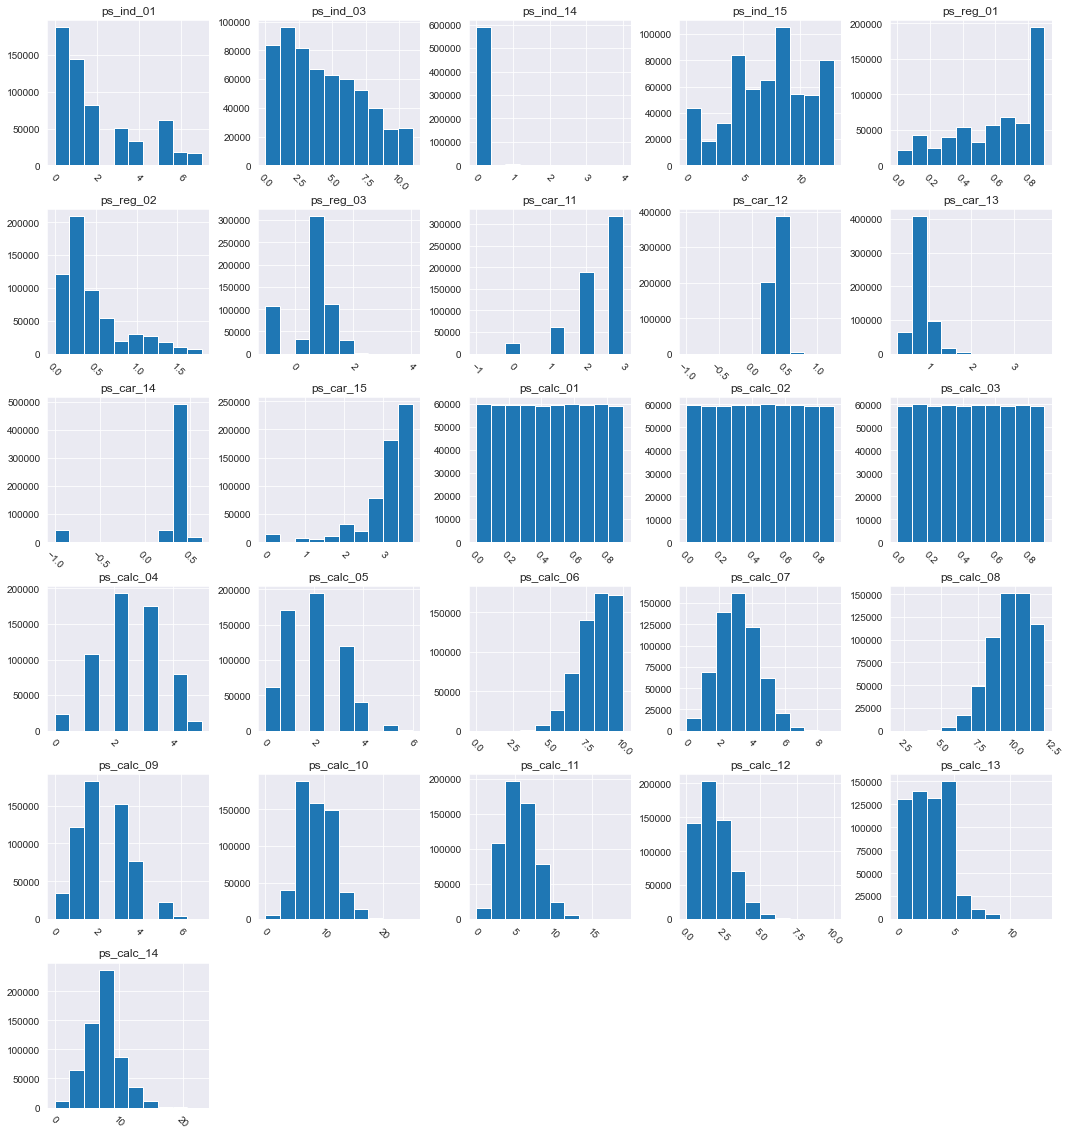

In [9]:
# Plot histogram grid of continuous featues (available as numeric)
df[cont_features].hist(figsize=(18,20),xrot=-45)
plt.title('Distribution of all numeric continuous features')
plt.show()

From the above histograms of the continuous features, we see that:
1. Features like - ps_calc_01, ps_calc_02 and ps_calc_03 follow an approximate unform distribution
2. Features like - ps_calc_07, ps_calc_10, ps_calc_11, ps_calc_14 follow an approximate normal distribution.

**Count Plots for categorical features (which are already coded and available as numeric values)**

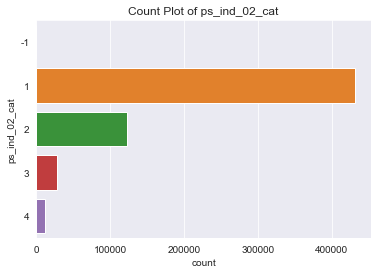

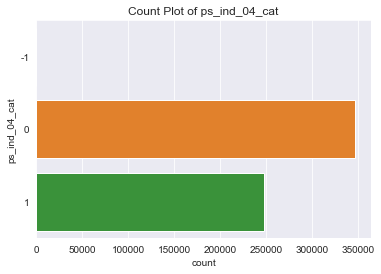

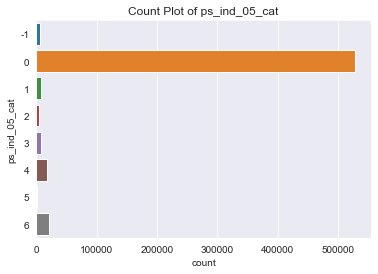

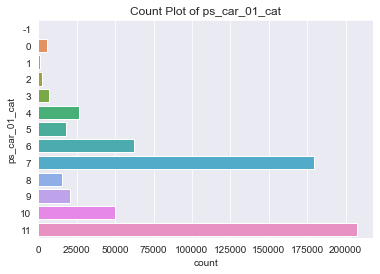

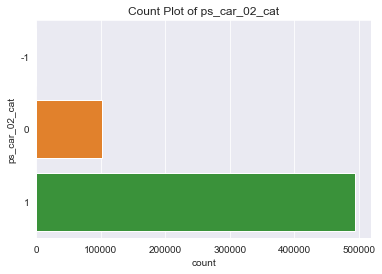

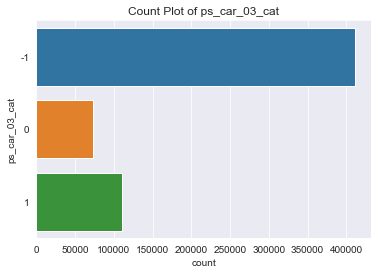

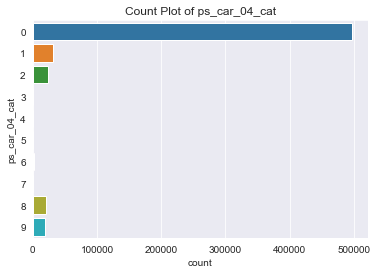

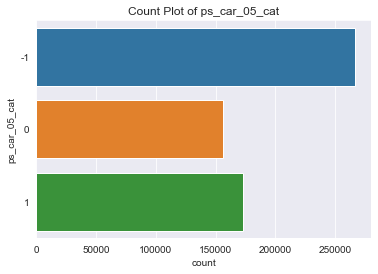

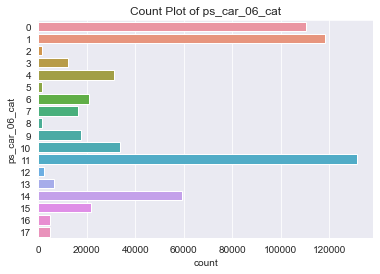

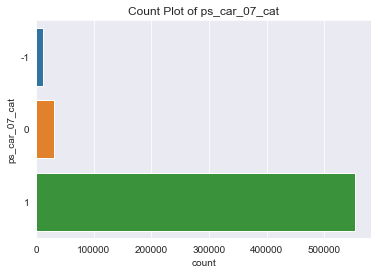

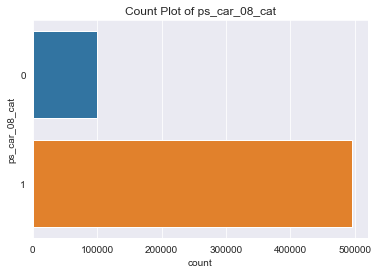

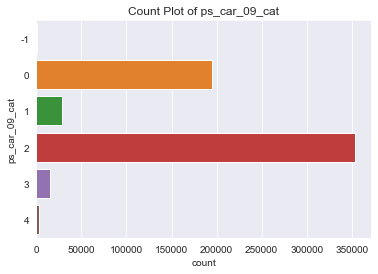

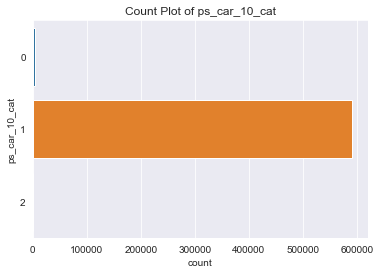

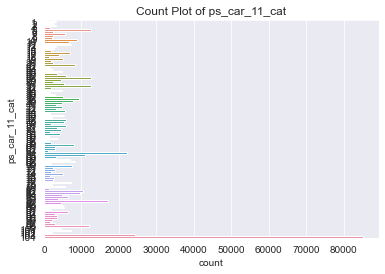

In [10]:
# Count plots of all categorical features (available as already encoded as numeric)"
for feature in df[cat_features].columns:
    sns.countplot(y=feature, data=df)
    name = "Count Plot of " + feature
    plt.title(name)
    plt.show()

From the above countplot, we can conclude that the below features have sparse classes:  
    ps_ind_02_cat,
    ps_ind_05_cat,
    ps_car_01_cat,
    ps_car_04_cat,
    ps_car_06_cat,
    ps_car_07_cat,
    ps_car_10_cat,
    ps_car_10_cat

### III. Correlations in our dataset

In [11]:
# Calculate correlations between numeric features
correlations = df.corr()

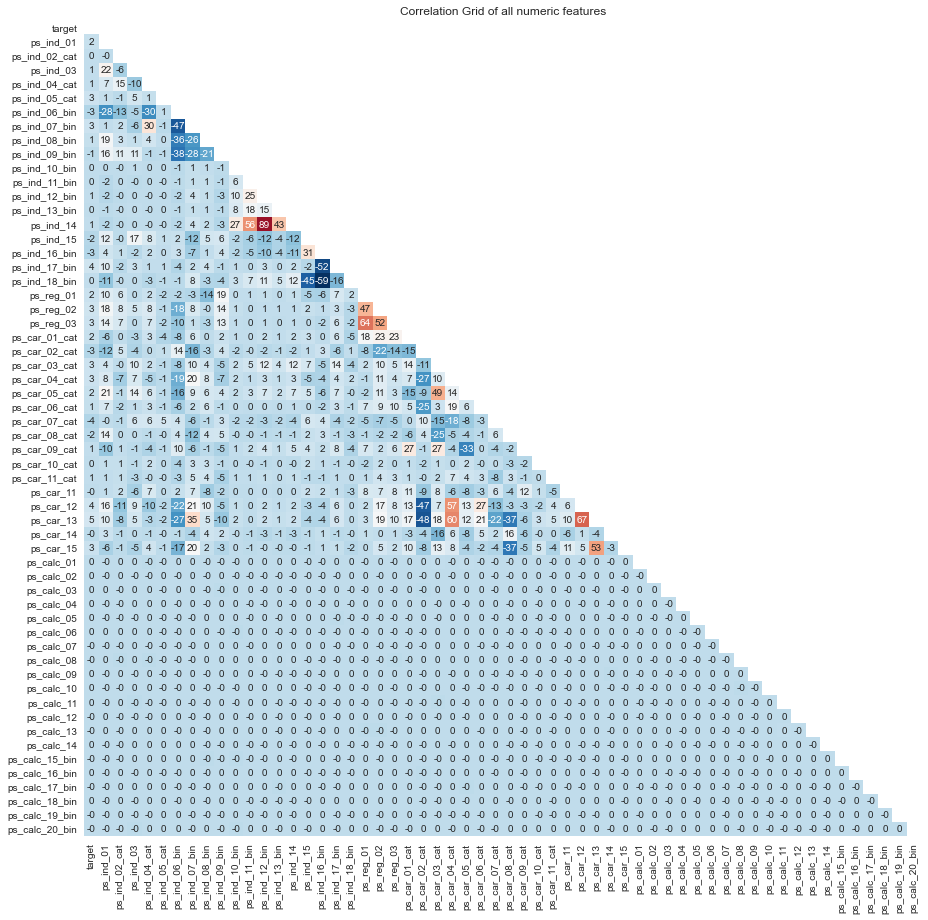

In [12]:
sns.set_style('white')
plt.figure(figsize=(15,15))

## mask the upper triangle of corelations
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = 1

# Plot heatmap of correlations
sns.heatmap(correlations*100,cmap='RdBu_r',annot=True,fmt='.0f',cbar=False, mask=mask)
plt.title("Correlation Grid of all numeric features")
plt.show()

From the above heatmap, we can conclude:
1. **None of the features are strongly correlated with the 'target' variable**
2. **Even, the other features do not have any strong correlation among each other**, except two features (ps_ind_12_bin and ps_ind_14) which have correlation of 0.89 between them.
3. **All the calculated features, which have 'calc' in their names (ps_calc_01, ps_calc_02,...,ps_calc_20_bin) do not have ZERO correlation with all other features.** ***Which may imply that they are pre-engineered features, in completely different dimensions, provided as part of the dataset.***

### IV. Segmentations of our data

**Univariate Segmentations**

As our target variable is binary (categorial), lets segment the continuous numeric features (which have non-zero correlation with target variable) with the target variable.

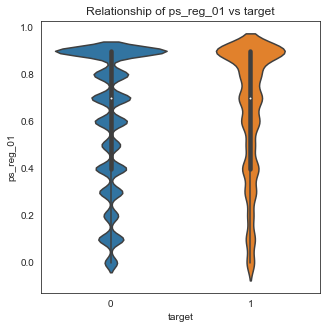

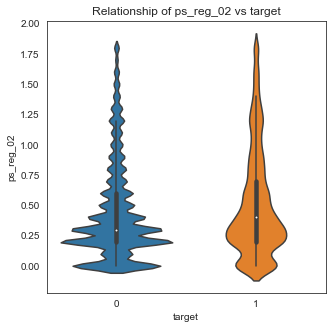

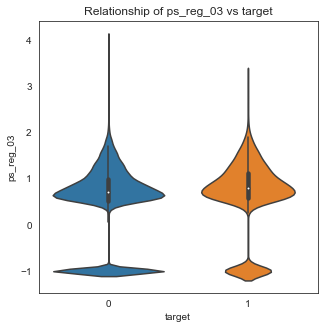

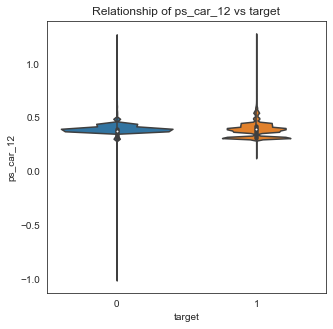

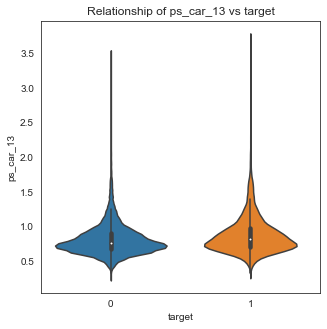

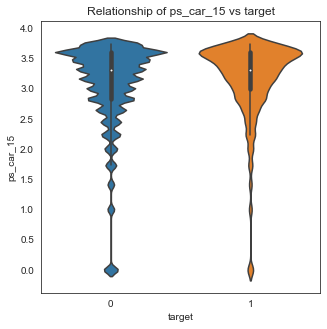

In [13]:
# Violin plot of some continuous features vs target variable
for feature in ['ps_reg_01','ps_reg_02','ps_reg_03','ps_car_12','ps_car_13','ps_car_15']:
    fig, ax = plt.subplots(figsize=(5,5))
    sns.violinplot(x='target', y=feature, data=df)
    name = "Relationship of " + feature + " vs target"
    plt.title(name)
    plt.show()

As expected, we see similar results from the violin plot as in the correlation heatmap. We do not get any useful insight from the violin plots

**Bivariate Segmentations**

Let's try to find any insights from the combination of two continuous features, if there is any relation with the 'target' variable, by plotting scatterplots of two continuous features **segmented by 'target'**.

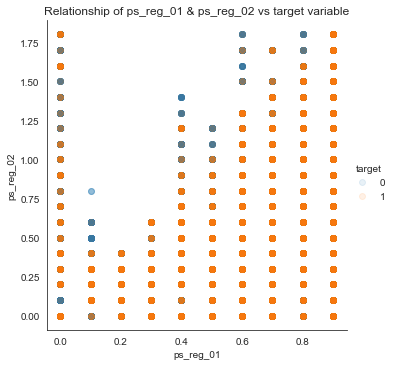

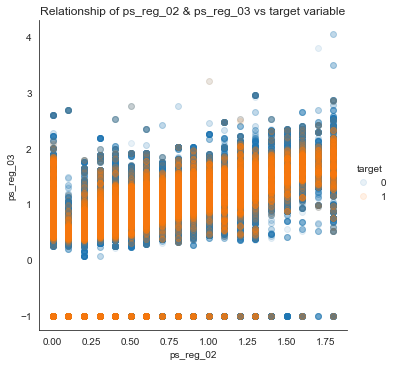

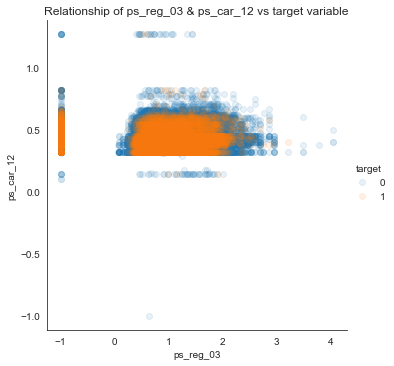

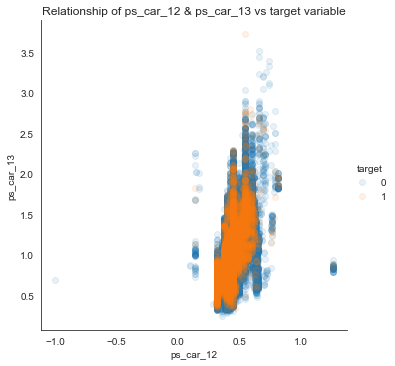

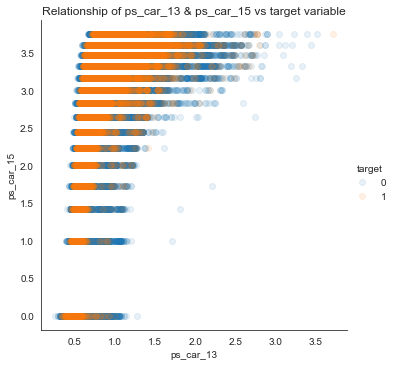

In [14]:
# Scatterplot of two continuos features segmented by target
for f1,f2 in [['ps_reg_01','ps_reg_02'], ['ps_reg_02','ps_reg_03'], ['ps_reg_03','ps_car_12'],
                          ['ps_car_12','ps_car_13'], ['ps_car_13','ps_car_15']]:
    sns.lmplot(x=f1, y=f2, hue='target',data=df, fit_reg=False, scatter_kws={'alpha':0.1})
    name = "Relationship of "+ f1 + " & " + f2 + " vs target variable"
    plt.title(name)
    plt.show()

From the bivariate segmentation also, we are unable to get any insight or clustering information about the relationship of the features with 'target'.

## Feature Selection

Our dataset has total of 58 features(including target variable). And, we saw that the features are not very correlated among themselves. Which brings us to the Feature Selection techniques to select and keep only important features in our dataset to avoid overfitting issues in our model building.
We will use 2 features selection techniques:
1. Forward Feature Selection
2. Feature Selection using L1-regularization

The final list of selected features will be the combination of features selected from the above techniques.

### I. Forward Feature Selection technique

References: 

*http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/#sequentialfeatureselector*
*http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#example-1-a-simple-sequential-forward-selection-example*

In [35]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# Model to use for FFS
model = LogisticRegression(penalty='l2',solver='liblinear', random_state=123)

In [36]:
# Separate the input and target features
X = df.drop('target', axis=1)
y = df.target

In [40]:
# Forward Feature Selection(ffs)
ffs = SequentialFeatureSelector(estimator=model,
                                k_features=30,
                                forward=True,
                                floating=False,
                                scoring = 'roc_auc',
                                verbose=1,
                                n_jobs=-1,
                                cv=None)

ffs.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   27.2s finished
Features: 1/30[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:   17.2s finished
Features: 2/30[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   16.5s finished
Features: 3/30[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   17.8s finished
Features: 4/30[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 

SequentialFeatureSelector(cv=None,
                          estimator=LogisticRegression(random_state=123,
                                                       solver='liblinear'),
                          k_features=30, n_jobs=-1, scoring='roc_auc',
                          verbose=1)

*The above 'Forward Feature Selection' took more than 45 minutes to fit*

**Score of the selected subset of features**

In [41]:
# Score of the Forward Feature Selection model
print( ffs.k_score_ )

0.6236862040229059


**The subset of selected features of Forward Feature Selection**

In [70]:
ffs_features = list(ffs.k_feature_names_)
print(ffs_features)

['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_09_bin', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']


### II. Feature Selection using L1-regularization

Reference: *https://www.datatechnotes.com/2021/04/selectfrommodel-feature-selection.html*

In [50]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Model to use in feature selection in SelectFromModel
l1_logistic = LogisticRegression(penalty='l1', solver='liblinear',random_state=123).fit(X,y)

# The selector object
selector = SelectFromModel(estimator=l1_logistic, threshold=-np.inf, prefit=True, max_features=30)

In [66]:
# mask for selected or unselected features
status = selector.get_support()
print(status)

[False  True False  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
 False  True False  True  True False  True False  True  True  True False
  True  True False  True False False False False False False False False
 False False False False False False False False False]


**The subset of selected features of L1 regularization**

In [71]:
all_features = np.array(X.columns)
l1_reg_features = list(all_features[status])
print(l1_reg_features)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_10_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_15', 'ps_calc_01', 'ps_calc_03']


### III. Final Feature Selection

Our final feature selection is the **UNION of features selected by "Forward Selection" and "L1 regularization"**

In [74]:
ffs_features = set(ffs_features)
l1_reg_features = set(l1_reg_features)

final_features_selected = list( ffs_features.union(l1_reg_features) )

In [75]:
print(len(final_features_selected))

38


So, we have **final 38 input features** selected for further stages of our machine learning workflow.

## Our Analytical Base Table (ABT)

Let's save our ABT on which we would perform our model building

In [86]:
# Merge the selected input features and target variable into our ABT
abt_columns = final_features_selected + ['target']
abt = df[abt_columns]

In [85]:
abt.shape

(595212, 39)

In [87]:
abt.head()

,ps_calc_02,ps_ind_12_bin,ps_ind_07_bin,ps_ind_15,ps_car_08_cat,ps_car_02_cat,ps_car_13,ps_car_07_cat,ps_car_04_cat,ps_car_14,ps_ind_02_cat,ps_ind_17_bin,ps_car_11,ps_ind_18_bin,ps_car_12,ps_ind_04_cat,ps_reg_03,ps_reg_01,ps_car_15,ps_calc_01,ps_car_09_cat,ps_ind_14,ps_ind_16_bin,ps_ind_05_cat,ps_ind_11_bin,ps_ind_01,ps_reg_02,ps_ind_08_bin,ps_car_10_cat,ps_car_03_cat,ps_car_05_cat,ps_car_01_cat,ps_car_06_cat,ps_calc_03,ps_ind_10_bin,ps_ind_06_bin,ps_ind_03,ps_ind_09_bin,target
0,0.5,0,1,11,0,1,0.883679,1,0,0.370810,2,1,2,0,0.400000,1,0.718070,0.7,3.605551,0.6,0,0,0,0,0,2,0.2,0,1,-1,1,10,4,0.2,0,0,5,0,0
1,0.1,0,0,3,1,1,0.618817,1,0,0.388716,1,0,3,1,0.316228,0,0.766078,0.8,2.449490,0.3,2,0,0,0,0,1,0.4,1,1,-1,-1,11,11,0.3,0,0,7,0,0
2,0.7,0,0,12,1,1,0.641586,1,0,0.347275,4,0,1,0,0.316228,1,-1.000000,0.0,3.316625,0.5,2,0,1,0,0,5,0.0,1,1,-1,-1,7,14,0.1,0,0,9,0,0
3,0.9,0,0,8,1,1,0.542949,1,0,0.294958,1,0,1,0,0.374166,0,0.580948,0.9,2.000000,0.6,3,0,1,0,0,0,0.2,0,1,0,1,7,11,0.1,0,1,2,0,0
4,0.6,0,0,9,1,1,0.565832,1,0,0.365103,2,0,3,0,0.316070,1,0.840759,0.7,2.000000,0.4,2,0,1,0,0,0,0.6,0,1,-1,-1,11,14,0.0,0,1,0,0,0


In [89]:
# Save the updated dataframe to a new file
abt.to_csv('analytical_base_table.csv', index=None)

Now, we can use our new dataframe **'analytical_base_table.csv'** for further model building process